# Introduction
This notebook introduces the helper functions needed to complete this challenge. We cover the Strategy class some example implementations.

## First we import the used libraries

In [1]:
# If running this locally make sure you have the following installed:
# tqdm, matplotlib, pandas, numpy
import datetime as dt
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
# Import help libraries
from supp import *

C:\Users\fredr\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Supp lib imported


## The Strategy class
The Strategy class includes methods that will ease the development of your strategy. The main objective for this challenge is to write a function take_position() that returns a vector of positions given some indata

In [2]:
# Import strategy object
s=Strategy()

print(s.take_position.__doc__)



        indata  -  as a dataframe with columns: I (Index), BM (Benchmark), FX (Exchange Rate)
        date - date of when the positions will be taken
        prev_date - previous date when signal was generated
        
        Has to return a float between 1 and -1
        


## Sample data
We can also retrive sample data from the Strategy object:

In [3]:
sample_data = s.sample_indata()

print("indata:")
print(sample_data["indata"].head(5))

print("date :")
print(sample_data["date"])

print("prev_date :")
print(sample_data["prev_date"])


C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for OMX
Date:  20130128 , previous date is not accurate
indata:
                   I        BM        FX
Date                                    
2004-01-06       NaN  0.001291 -0.000182
2004-01-07 -0.014188  0.002364  0.004197
2004-01-08  0.019063  0.004951 -0.007908
2004-01-09  0.004283 -0.008927 -0.003105
2004-01-12  0.002840  0.004775  0.007402
date :
2013-01-28 00:00:00
prev_date :
2012-12-29 00:00:00


## Example take_postion() function

Let's write a functions that randomy assigns positions between -1 and 1

In [4]:
# Write a function taking indata, date and prev_date and return a float (or np.float) between -1 and 1

def example_function(indata, date, prev_date):
    """
    Generates a random position
    """
    return np.random.random()*2-1



# Test if your function works:
print("Test 1: ")
print(example_function(**sample_data))
print("Test 2: ")
print(example_function(**sample_data))
print("Test 3: ")
print(example_function(**sample_data))

Test 1: 
0.16796413455107273
Test 2: 
-0.5203318615948882
Test 3: 
-0.3398860936312973


## Patch the function to your Strategy object
We can now assign our example function to the Strategy object:

In [5]:
s.take_position=example_function

# Test the strategy performance
We can use the function test() to see how well our strategy works:

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for OMX
Generating predictions



Predictions are done


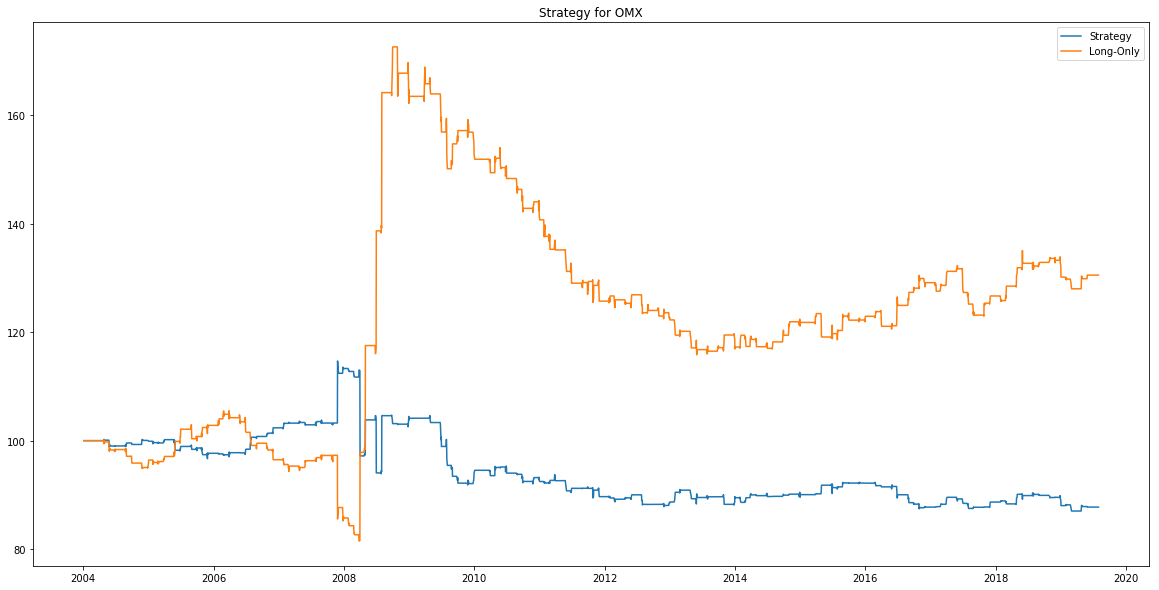

In [6]:
results=s.test()

... Or strategy does not out-perform a strategy where we hold all currencies

# A More Advanced Example
In this example we try out a strategy that will go long indices with positive past performance and go short the others. We also feed the test() function with some relevant parameters

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for FTSE
Generating predictions



Predictions are done


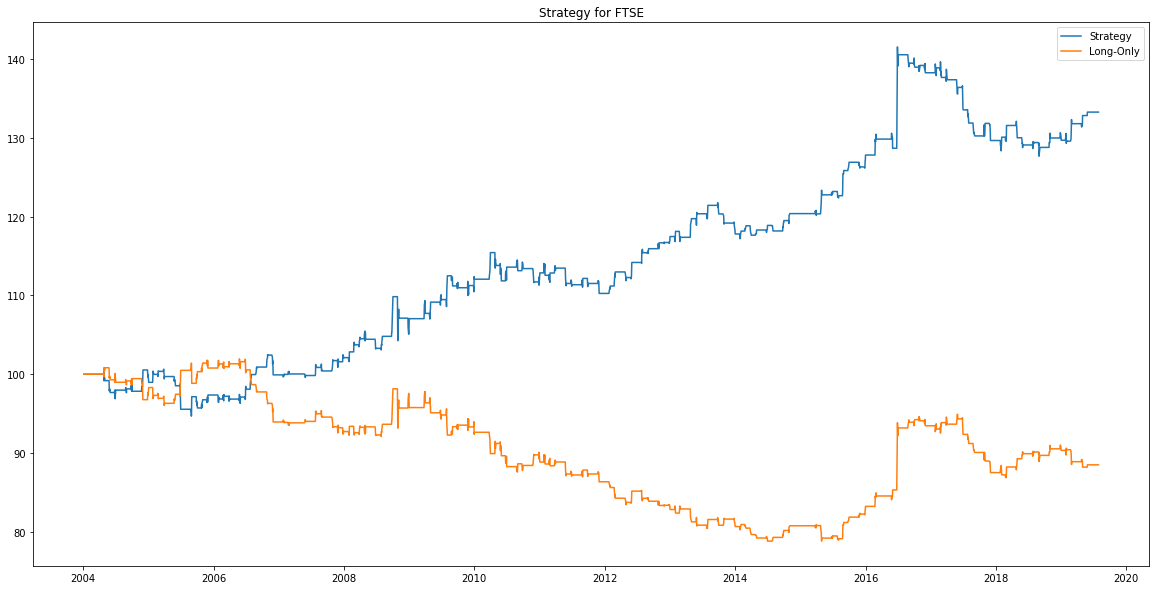

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for NIKKEI
Generating predictions



Predictions are done


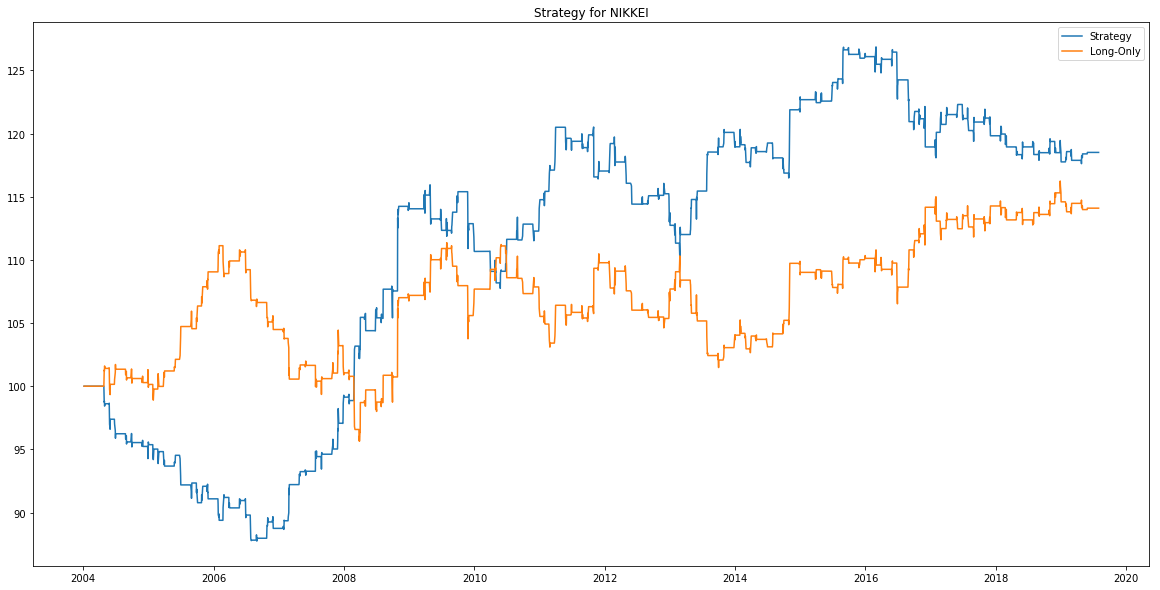

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for DAX
Generating predictions



Predictions are done


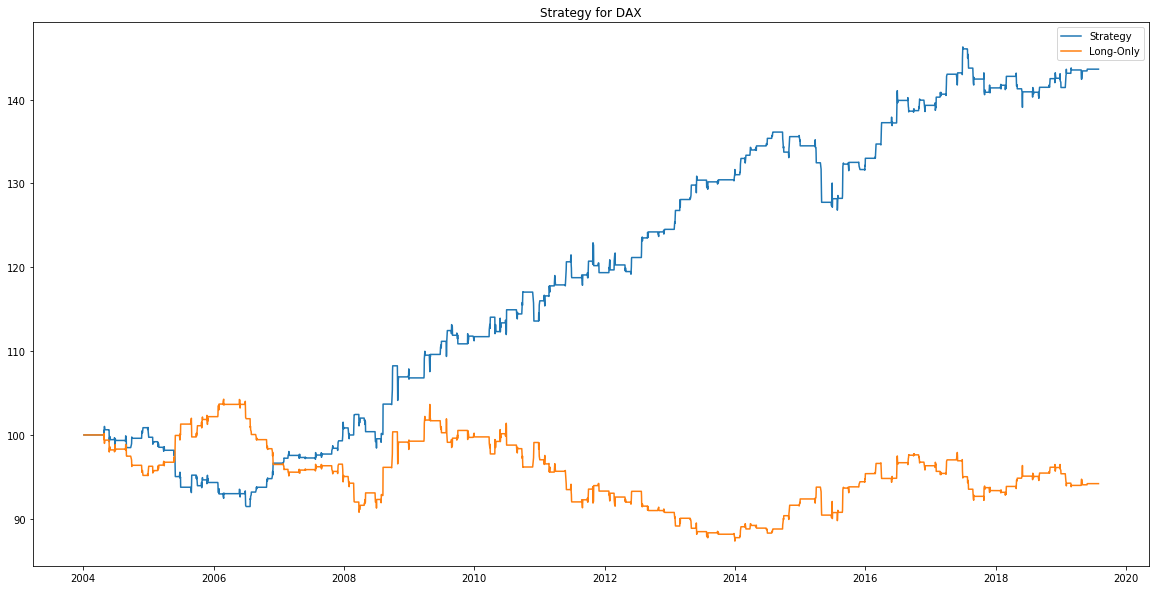

C:\Users\fredr\ap1-case\supp.py:29: RuntimeWarning: invalid value encountered in log
  lgrt=np.log(prices / prices.shift(1))


Loaded data for OMX
Generating predictions



Predictions are done


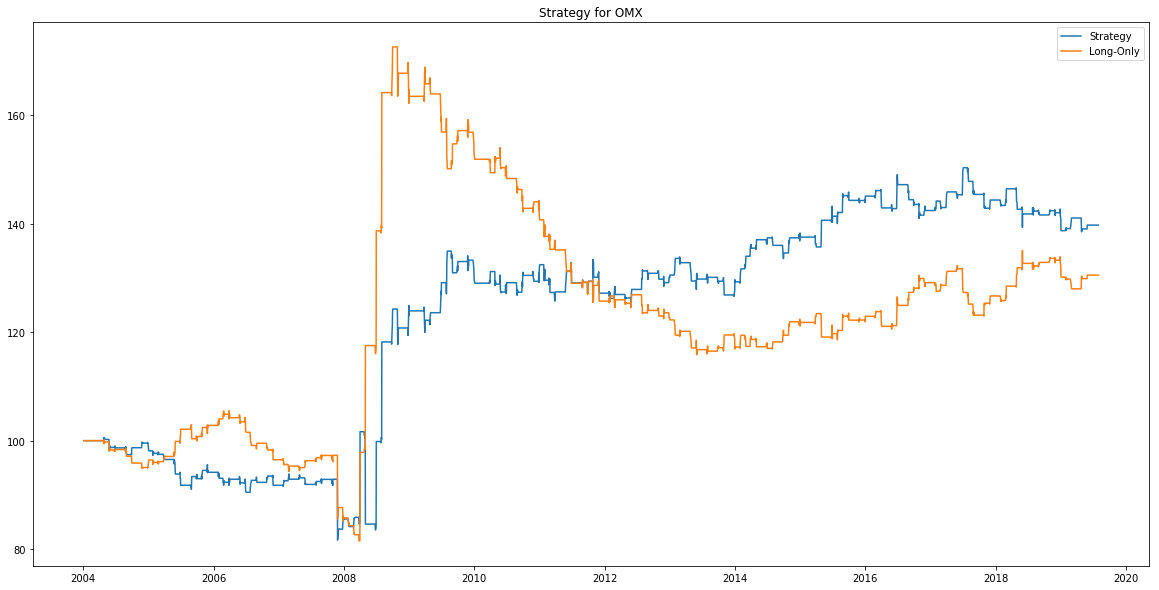

In [7]:
# Some advanced options
def example_function2(indata, date, prev_date):
    """
    Go long if Index gained since previous date, else go short
    """
    return (indata.loc[prev_date:date,'I'].sum()<0)*2-1

# Patch your strategy with the function
s.take_position=example_function2
result=s.test(
    index="All", # Use "All" to run the test for all programs
    holding=3, # Holding defines the number of days the position will be held
    shift=3 # Defines the number of days by which the positions are shifted
)

# ... This strategy out-performs the long only strategy!

## Challenge
Use the Strategy class and write your take_position function

In [8]:
s=Strategy()
print(s.take_position.__doc__)


        indata  -  as a dataframe with columns: I (Index), BM (Benchmark), FX (Exchange Rate)
        date - date of when the positions will be taken
        prev_date - previous date when signal was generated
        
        Has to return a float between 1 and -1
        
